In [92]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [202]:
class RunResult:
    def __init__(self, errors, evs):
        self.errors = errors
        self.evs = evs

,error,error,error,error,error,error,error,0,0
0,893363.440985,893363.698248,893372.316288,893363.698167,893369.102295,893363.697967,893359.970799,893327.768705,891813.032869
1,892898.669937,892611.122239,887118.404257,835411.223123,835509.753131,787446.644056,885252.187374,832534.726148,847243.725331
2,892389.787506,891786.115784,880783.839917,842564.261192,842589.356230,752044.465385,878362.971703,800163.865748,837684.799883
3,891830.941169,890880.416396,874470.229859,830823.649611,830856.051542,748196.487839,872640.364746,752793.382462,834642.603031
4,891216.608040,889891.370581,868321.045676,836504.873060,836516.360555,739263.865962,868036.909324,751620.479522,832570.037354
5,890546.066322,888797.663723,862522.896195,828636.169317,828639.115198,731759.856873,864509.874553,750939.447460,831183.503872
6,889800.962323,887609.502478,857302.049694,822960.808884,822962.928002,732237.031148,862007.774383,748874.539576,829578.928216
7,888993.603316,886314.693172,852949.914323,818890.164273,818894.748555,720271.364161,NaN,745914.870687,828625.263398
8,888114.099287,884898.207156,849819.688003,820681.275478,820677.027877,718329.873551,NaN,747514.363728,827218.356095
9,887149.882864,883350.808503,848220.319801,818002.932294,817984.449196,719159.735776,NaN,745955.126099,826468.495135


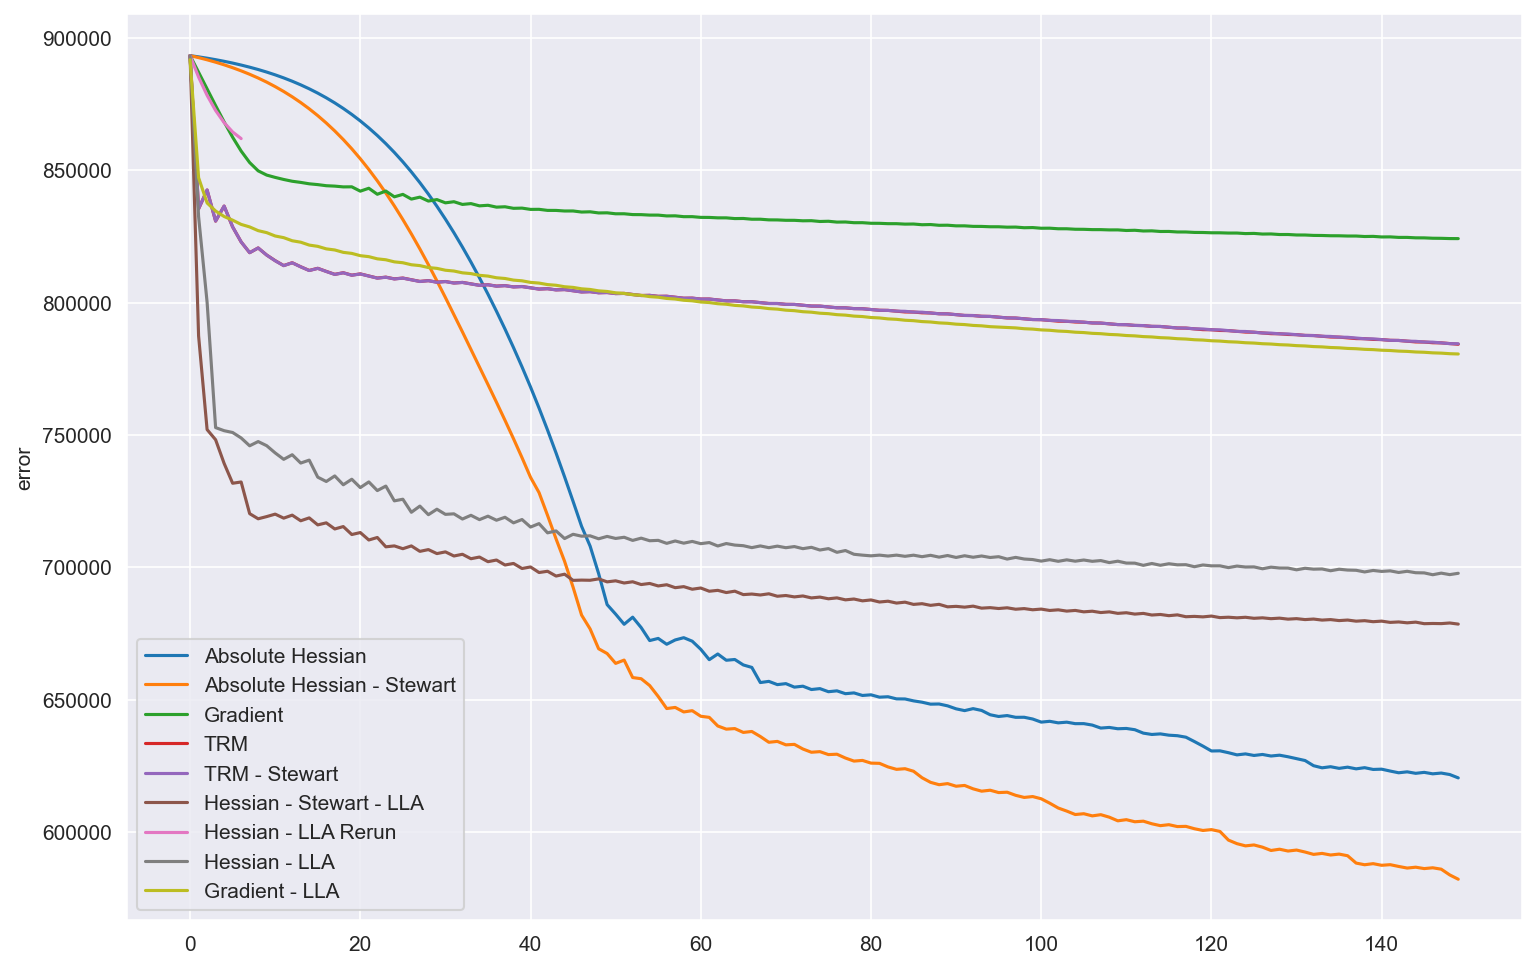

In [406]:
import os

def get_run_result(summ_dir):
    summ_fns = os.listdir(summ_dir)

    jsons = []
    errors = []
    evs = []
    for fn in summ_fns:
        with open(summ_dir + fn) as file:
            data = json.load(file)
            jsons.append(data)
            evs.append(data['evs'])
            errors.append(data['error'])

    errors = pd.Series(errors, name='error')
    evs = pd.DataFrame(evs)

    return RunResult(errors, evs)

abh = get_run_result('../../archives/abh/summaries/')
abhst = get_run_result('../../archives/abhst/summaries/')
gra = get_run_result('../../archives/gra/summaries/')
trm = get_run_result('../../archives/trm/summaries/')
trmst = get_run_result('../../archives/trmst/summaries/')
hesstlla = get_run_result('../../archives/hesstlla/summaries/')
heslla = get_run_result('../../summaries/')
heslla_errors = pd.read_csv('../../python/ssef/qaerrors.csv', header=None).iloc[:150]
gralla_errors = pd.read_csv('../../python/ssef/gradienterrors.csv', header=None).iloc[:150]

display(pd.concat([abh.errors, abhst.errors, gra.errors,
                   trm.errors, trmst.errors, hesstlla.errors, heslla.errors,
                   heslla_errors, gralla_errors], axis=1))

plt.figure(figsize=(12, 8), dpi=150)
ax = 0
for rr in [abh, abhst, gra, trm, trmst, hesstlla, heslla]:
    ax = sns.lineplot(x=rr.errors.index, y=rr.errors)

sns.lineplot(x=heslla_errors.index, y=heslla_errors[0])
sns.lineplot(x=gralla_errors.index, y=gralla_errors[0])

ax.legend(['Absolute Hessian', 'Absolute Hessian - Stewart', 'Gradient', 'TRM', 'TRM - Stewart', 'Hessian - Stewart - LLA', 'Hessian - LLA Rerun', 'Hessian - LLA', 'Gradient - LLA'])

<AxesSubplot:>

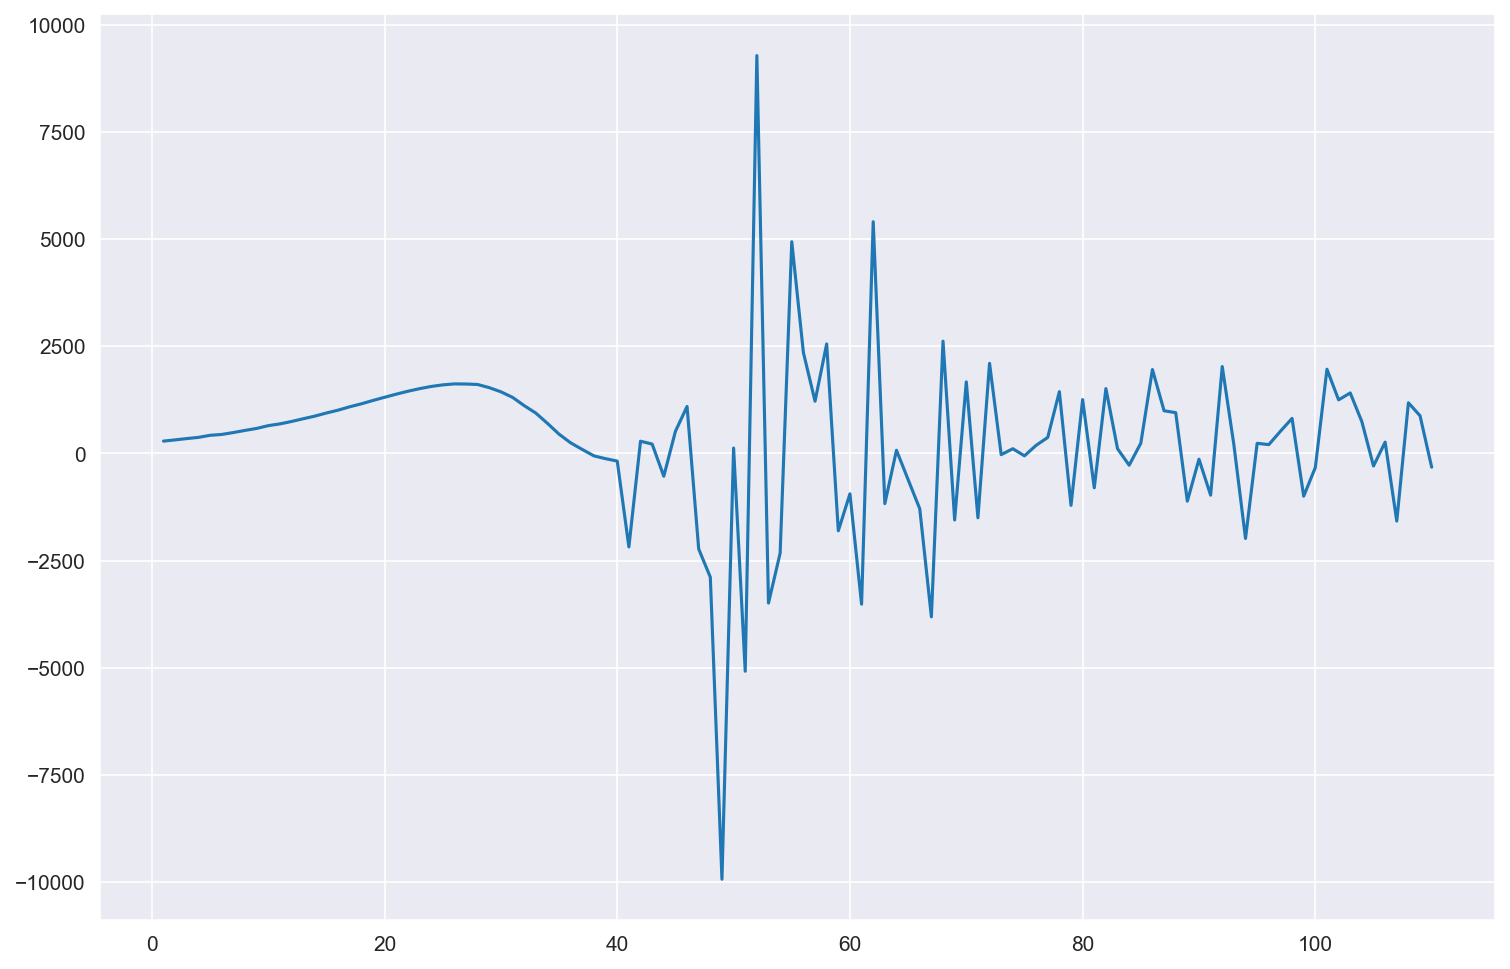

In [315]:
endn = len(abhst.errors) - 1
ggs = []

for i in range(1, endn):
    g = abh.errors[i] - abh.errors[i - 1]
    stg = abhst.errors[i] - abhst.errors[i - 1]
    ggs.append(g - stg)

plt.figure(figsize=(12, 8), dpi=150)
sns.lineplot(x=[x for x in range(1, endn)], y=ggs)

In [377]:
display(trm.evs)
display(trmst.evs)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,-3.450493e+09,-4.892330e+08,-3.661020e+08,-2.172266e+08,-1.129083e+08,-7.601197e+07,-3.638091e+07,-1.683134e+07,-1.585078e+07,-9.747259e+06,-2.422834e+06,-1.717134e+06,-1.433501e+06,-505860.885511,-383420.544898,-145682.509242,-83647.177575,-10097.966152,-8883.005580,-417.177801,84978.183945,209591.596924,893275.771009,1.562423e+06,3.388374e+06,3.690366e+06,9.670413e+06,1.947119e+07,1.067062e+08,2.117435e+08,2.509236e+08,4.061927e+08,5.167639e+08,6.716953e+08,1.180214e+09,4.721665e+09,4.624709e+10
1,-3.444318e+09,-4.982522e+08,-3.705219e+08,-2.219475e+08,-1.135895e+08,-7.716083e+07,-3.675766e+07,-1.729056e+07,-1.620250e+07,-9.734479e+06,-2.371929e+06,-1.733345e+06,-1.433199e+06,-464456.764269,-360085.471542,-142348.344095,-83904.649678,-11213.288400,-3910.475909,-417.762372,126956.704534,282218.743889,684636.436259,1.557642e+06,3.177604e+06,3.636082e+06,8.941797e+06,1.953373e+07,1.064929e+08,2.122056e+08,2.474527e+08,4.035478e+08,5.172906e+08,6.690562e+08,1.176462e+09,4.636765e+09,4.606716e+10
2,-3.460886e+09,-4.940571e+08,-3.688905e+08,-2.202581e+08,-1.133667e+08,-7.686933e+07,-3.661411e+07,-1.706742e+07,-1.614890e+07,-9.750378e+06,-2.402063e+06,-1.737274e+06,-1.434790e+06,-473897.229519,-379081.985435,-143883.464326,-84340.513003,-10923.675126,-5349.169480,-454.562507,115368.258892,244389.711805,749888.419162,1.560063e+06,3.256616e+06,3.643587e+06,9.147937e+06,1.949922e+07,1.066123e+08,2.119228e+08,2.489727e+08,4.047906e+08,5.167819e+08,6.698282e+08,1.176638e+09,4.692402e+09,4.620403e+10
3,-3.446284e+09,-4.974397e+08,-3.702386e+08,-2.217123e+08,-1.135774e+08,-7.729238e+07,-3.674327e+07,-1.729756e+07,-1.621537e+07,-9.733017e+06,-2.378679e+06,-1.746998e+06,-1.434335e+06,-465480.482202,-360633.118326,-142782.100615,-83925.391465,-11356.634262,-3849.849415,-414.647626,126710.806779,283916.708336,671268.840409,1.557835e+06,3.176827e+06,3.637629e+06,8.892167e+06,1.952324e+07,1.064916e+08,2.122129e+08,2.477058e+08,4.037557e+08,5.172887e+08,6.691628e+08,1.175980e+09,4.644184e+09,4.608981e+10
4,-3.457669e+09,-4.944936e+08,-3.690896e+08,-2.205207e+08,-1.134193e+08,-7.708387e+07,-3.664187e+07,-1.713485e+07,-1.618481e+07,-9.743664e+06,-2.399806e+06,-1.748466e+06,-1.435417e+06,-470060.976252,-375389.200133,-143714.440608,-84365.804459,-11153.373630,-4781.797912,-452.239279,119866.599587,256628.674665,714975.162162,1.559412e+06,3.231296e+06,3.642521e+06,9.036898e+06,1.949913e+07,1.065742e+08,2.120196e+08,2.487657e+08,4.046228e+08,5.169274e+08,6.696764e+08,1.176069e+09,4.682794e+09,4.618469e+10
5,-3.447503e+09,-4.968252e+08,-3.700243e+08,-2.215216e+08,-1.135649e+08,-7.737592e+07,-3.673203e+07,-1.730036e+07,-1.622386e+07,-9.732170e+06,-2.383564e+06,-1.756675e+06,-1.435089e+06,-466069.198777,-360678.238700,-143040.683740,-83933.535849,-11460.143523,-3780.911464,-412.544267,126864.165810,285982.914374,660884.384040,1.557915e+06,3.175317e+06,3.639137e+06,8.861318e+06,1.951605e+07,1.064907e+08,2.122232e+08,2.478849e+08,4.039016e+08,5.172689e+08,6.691950e+08,1.175573e+09,4.649258e+09,4.610558e+10
6,-3.433273e+09,-4.970713e+08,-3.698085e+08,-2.212976e+08,-1.135363e+08,-7.740193e+07,-3.672767e+07,-1.731538e+07,-1.623011e+07,-9.713516e+06,-2.377170e+06,-1.756810e+06,-1.434730e+06,-465490.785016,-356846.832578,-142745.074032,-83958.145324,-11488.618492,-3583.283083,-402.944811,128834.648265,293614.743723,648259.552499,1.556365e+06,3.168753e+06,3.647186e+06,8.847480e+06,1.951721e+07,1.064359e+08,2.123754e+08,2.477945e+08,4.037652e+08,5.176315e+08,6.694624e+08,1.176238e+09,4.627843e+09,4.604691e+10
7,-3.421441e+09,-4.972857e+08,-3.696355e+08,-2.211136e+08,-1.135140e+08,-7.743335e+07,-3.672455e+07,-1.733033e+07,-1.623580e+07,-9.697343e+06,-2.372070e+06,-1.757808e+06,-1.434341e+06,-465345.964861,-353399.906743,-142557.324866,-83954.627666,-11524.435061,-3419.432348,-391.092906,130328.870154,300329.520303,636954.442657,1.554976e+06,3.162499e+06,3.65392

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,-3.485270e+09,-5.003052e+08,-3.707954e+08,-2.216016e+08,-1.139961e+08,-7.978330e+07,-3.744277e+07,-1.808851e+07,-1.641181e+07,-1.041611e+07,-2.655492e+06,-2.111717e+06,-1.445908e+06,-554900.742736,-384527.405615,-179890.313406,-92121.647807,-14313.165817,-2373.712139,-527.108224,112323.195988,180528.013685,324489.090181,1.549819e+06,2.826799e+06,3.566733e+06,7.629570e+06,1.941755e+07,1.061999e+08,2.114787e+08,2.481296e+08,4.034593e+08,5.133117e+08,6.663383e+08,1.170693e+09,4.686267e+09,4.621810e+10
1,-3.450666e+09,-5.012829e+08,-3.705207e+08,-2.214603e+08,-1.141035e+08,-7.994164e+07,-3.745755e+07,-1.815227e+07,-1.640673e+07,-1.039528e+07,-2.650236e+06,-2.121883e+06,-1.448660e+06,-559085.689422,-384005.215277,-180749.689127,-92474.867885,-14396.834471,-2403.407166,-523.851781,110861.350603,179152.621381,324392.688435,1.550826e+06,2.825134e+06,3.577129e+06,7.568097e+06,1.941311e+07,1.061957e+08,2.119150e+08,2.481599e+08,4.030940e+08,5.142588e+08,6.670306e+08,1.172571e+09,4.628987e+09,4.606070e+10
2,-3.478036e+09,-5.002151e+08,-3.707246e+08,-2.216927e+08,-1.140492e+08,-7.980957e+07,-3.744758e+07,-1.809384e+07,-1.640712e+07,-1.041997e+07,-2.654808e+06,-2.112784e+06,-1.448487e+06,-555940.973918,-385126.899972,-180275.962823,-92300.901124,-14359.972421,-2381.772281,-529.316595,112369.617473,180139.946143,324241.731445,1.552303e+06,2.828202e+06,3.569662e+06,7.634707e+06,1.941301e+07,1.062519e+08,2.116432e+08,2.482802e+08,4.034517e+08,5.136552e+08,6.664783e+08,1.170718e+09,4.674187e+09,4.618889e+10
3,-3.454236e+09,-5.008719e+08,-3.705068e+08,-2.214890e+08,-1.140741e+08,-7.991987e+07,-3.745772e+07,-1.813775e+07,-1.640668e+07,-1.040249e+07,-2.650572e+06,-2.119865e+06,-1.448819e+06,-558682.321157,-384764.793659,-180777.332003,-92505.176858,-14412.603572,-2403.736937,-526.138243,111229.430744,179403.950651,323541.402941,1.551303e+06,2.826745e+06,3.576604e+06,7.589753e+06,1.941302e+07,1.061975e+08,2.119186e+08,2.481809e+08,4.031574e+08,5.142774e+08,6.669291e+08,1.171932e+09,4.634812e+09,4.608201e+10
4,-3.473170e+09,-5.001062e+08,-3.706412e+08,-2.216441e+08,-1.140352e+08,-7.982689e+07,-3.745029e+07,-1.809724e+07,-1.640697e+07,-1.041957e+07,-2.653711e+06,-2.113551e+06,-1.448666e+06,-556508.235136,-385568.248987,-180456.357621,-92380.766804,-14389.171367,-2388.748372,-529.917965,112275.813556,180019.381886,323437.220182,1.552289e+06,2.828838e+06,3.571512e+06,7.636459e+06,1.941301e+07,1.062356e+08,2.117325e+08,2.482594e+08,4.034049e+08,5.138501e+08,6.665198e+08,1.170604e+09,4.666101e+09,4.617079e+10
5,-3.456618e+09,-5.005418e+08,-3.704860e+08,-2.214966e+08,-1.140522e+08,-7.990325e+07,-3.745654e+07,-1.812753e+07,-1.640671e+07,-1.040743e+07,-2.650932e+06,-2.118527e+06,-1.448864e+06,-558357.514658,-385362.283234,-180788.539781,-92521.816259,-14428.415970,-2403.842278,-527.735297,111479.298699,179592.422184,322990.978746,1.551562e+06,2.827867e+06,3.576393e+06,7.605303e+06,1.941303e+07,1.061979e+08,2.119259e+08,2.481854e+08,4.031992e+08,5.142709e+08,6.668156e+08,1.171409e+09,4.638703e+09,4.609681e+10
6,-3.443096e+09,-5.008893e+08,-3.703364e+08,-2.213145e+08,-1.140368e+08,-7.996661e+07,-3.746287e+07,-1.815197e+07,-1.640814e+07,-1.039599e+07,-2.648226e+06,-2.122394e+06,-1.448118e+06,-559634.229059,-385193.400584,-180939.816953,-92618.961549,-14453.569796,-2417.096589,-525.518189,110754.077836,179718.469198,322396.624542,1.549988e+06,2.826989e+06,3.580275e+06,7.578579e+06,1.941483e+07,1.061369e+08,2.120728e+08,2.480528e+08,4.030062e+08,5.146036e+08,6.670425e+08,1.172008e+09,4.616503e+09,4.603765e+10
7,-3.431775e+09,-5.011699e+08,-3.702046e+08,-2.211526e+08,-1.140223e+08,-8.001968e+07,-3.746758e+07,-1.817225e+07,-1.640930e+07,-1.038596e+07,-2.645787e+06,-2.125448e+06,-1.447423e+06,-560582.218853,-385116.143256,-181027.414911,-92702.795179,-14473.438914,-2428.300515,-523.760610,110163.542941,180039.197997,321975.304370,1.548602e+06,2.826457e+06,3.5836

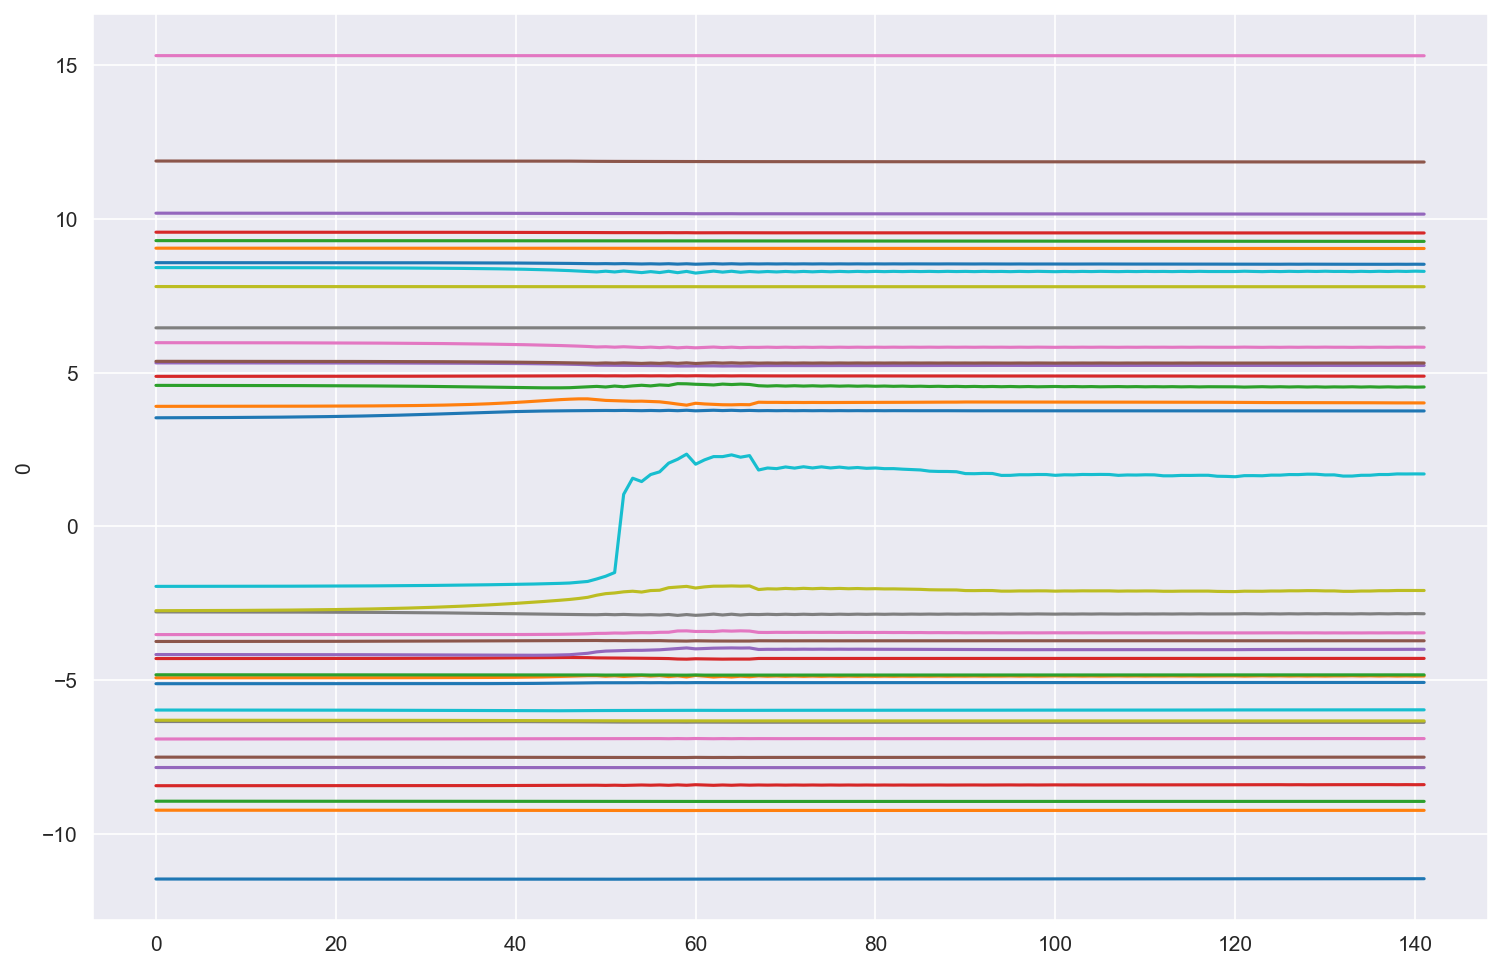

In [196]:
logevs = np.sign(evs) * evs.abs() ** (1 / 9)
# logevs = np.sign(evs) * np.log10(evs.abs())

plt.figure(figsize=(12, 8), dpi=150)
for i in range(len(logevs.columns)):
    sns.lineplot(x=logevs.index, y=logevs[i])

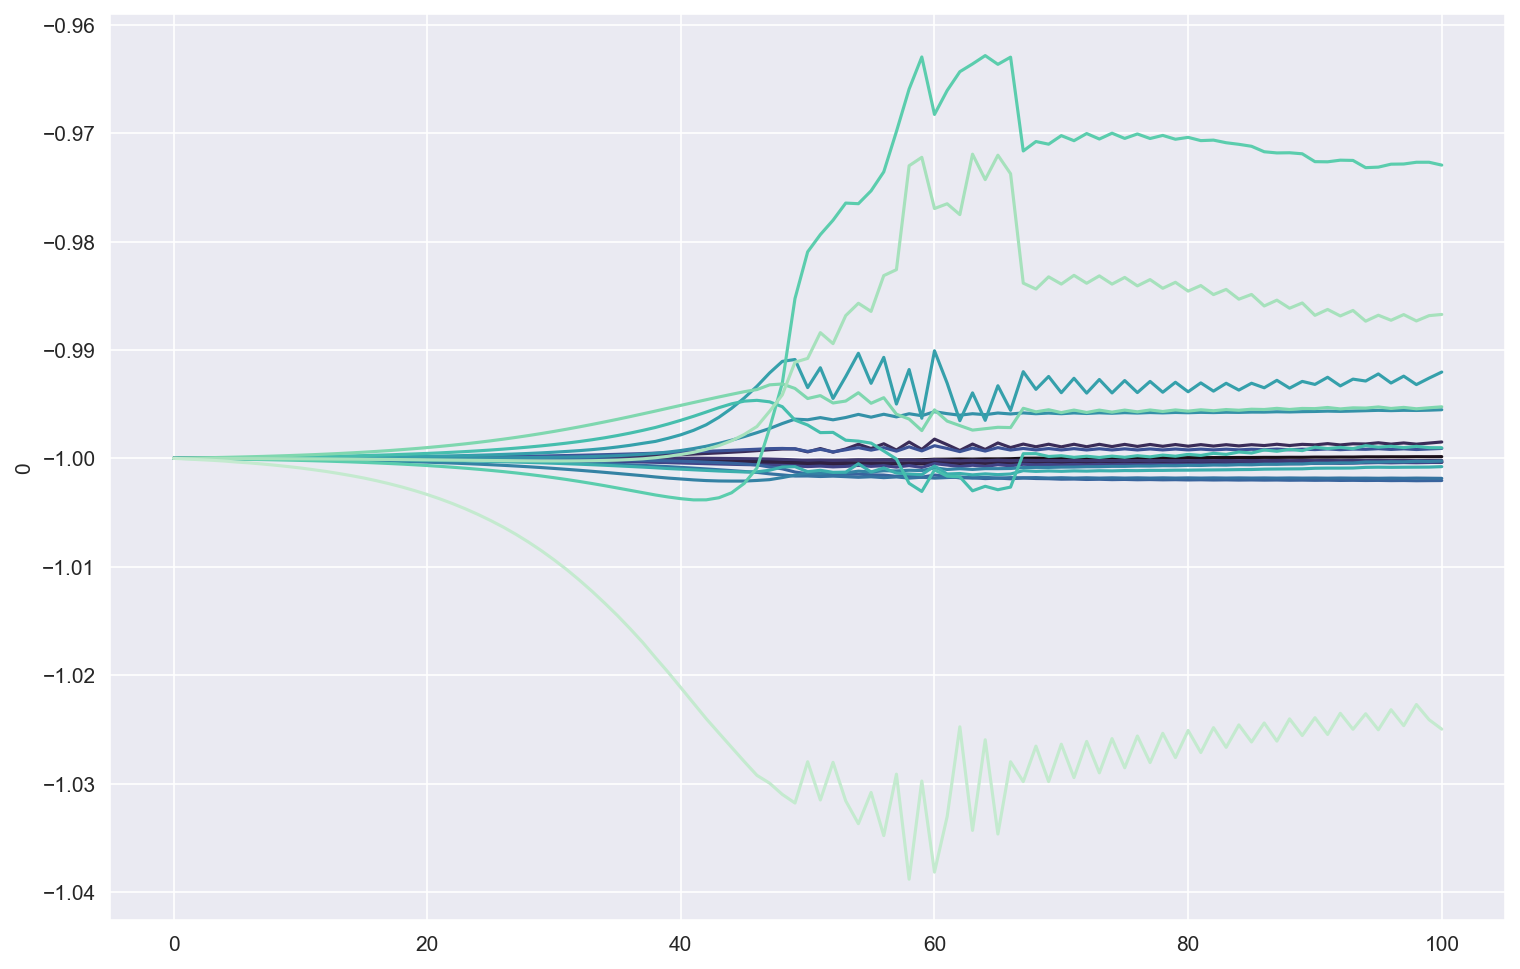

In [181]:
plt.figure(figsize=(12, 8), dpi=150)

n = len(logevs.columns)
n = 18
pal = sns.color_palette('mako', n)
for i in range(n):
    sns.lineplot(x=logevs.index, y=logevs[i] / abs(logevs.iloc[0, i]), color=pal[i])